# SVM Classifier on the Digits Dataset

This notebook presents a step-by-step workflow for building a simple digit classifier using a **Support Vector Machine (SVM)** and the popular `sklearn` digits dataset. We cover data loading, model training, evaluation, and visualization.


## 1. Import Required Libraries

We begin by importing core libraries:

- `sklearn.datasets`: to load the digits dataset.
- `sklearn.model_selection`: to split the data into training and test sets.
- `sklearn.svm`: to use the Support Vector Classifier (SVC).
- `sklearn.metrics`: to evaluate the model's accuracy.
- `matplotlib.pyplot` and `numpy`: for visualization and numerical processing.


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

## 2. Load the Digits Dataset

We use `load_digits()` to import the dataset of 8x8 grayscale images representing handwritten digits (0 through 9).

- Each image is 8×8 pixels (64 features).
- The dataset is already labeled, which makes it suitable for supervised learning.


In [5]:
# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

## 3. Split Dataset into Train and Test Sets

We use `train_test_split` to divide the dataset into two parts:

- **Training set**: 80% of the data, used to fit the model.
- **Test set**: 20% of the data, used to evaluate generalization performance.

We set `random_state=42` for reproducibility.


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Create and Train the SVM Classifier

We initialize an `SVC` model from `sklearn.svm` with a **linear kernel**. This means the classifier will try to find a straight-line decision boundary in the feature space.

The model is trained on the training set using the `fit()` method.


In [7]:


# Create and train SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

## 5. Make Predictions and Evaluate Accuracy

We use the trained model to predict digit labels on the test set using `predict()`.

We then calculate the **accuracy score**, which measures the proportion of correct predictions among the total.


In [8]:
# Make predictions on test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


## 6. Visualize Some Predictions

To qualitatively assess the model, we display several examples from the test set:

- Each image is plotted with its **true label** and the **predicted label**.
- This visual check helps identify common misclassifications and evaluate confidence in predictions.


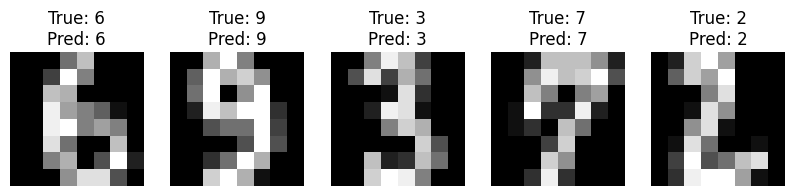

In [9]:
images_and_labels = list(zip(X_test[:5], y_test[:5], y_pred[:5]))
plt.figure(figsize=(10,2))
for i, (image, true_label, pred_label) in enumerate(images_and_labels):
    plt.subplot(1, 5, i+1)
    plt.imshow(image.reshape(8,8), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.show()
